<a href="https://colab.research.google.com/github/Ganapathi-tech/ganapathi-tech-Ganesh/blob/main/pokemen_clusturing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
Pokedex = pd.read_csv("Pokemon.csv")
Pokedex["Type 2"].fillna("-", inplace = True)
Pokedex

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,-,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Before clustering, let's take a look on Pokemons Skills.

Boxplot give us the basic stats of each feature.

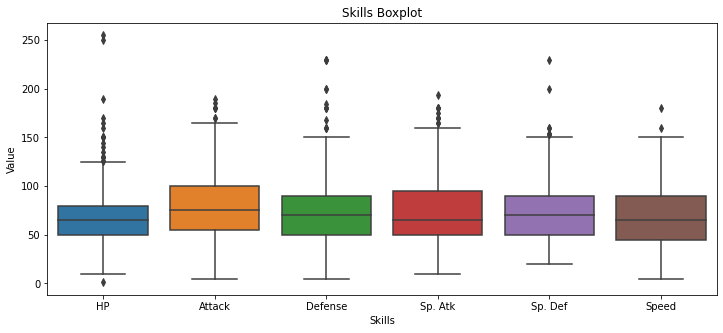

In [ ]:
BoxPlotPkdex = pd.melt(Pokedex, id_vars = [
    "#", 
    "Name", 
    "Type 1", 
    "Type 2", 
    "Generation"
    ], value_vars = [
    #"Total",
    "HP", "Attack", "Defense", "Sp. Atk",
    "Sp. Def", "Speed"    
])
plt.figure(figsize=(12,5))
ax = sns.boxplot(x="variable", y="value", data=BoxPlotPkdex)
plt.title("Skills Boxplot")
plt.xlabel("Skills")
plt.ylabel("Value");

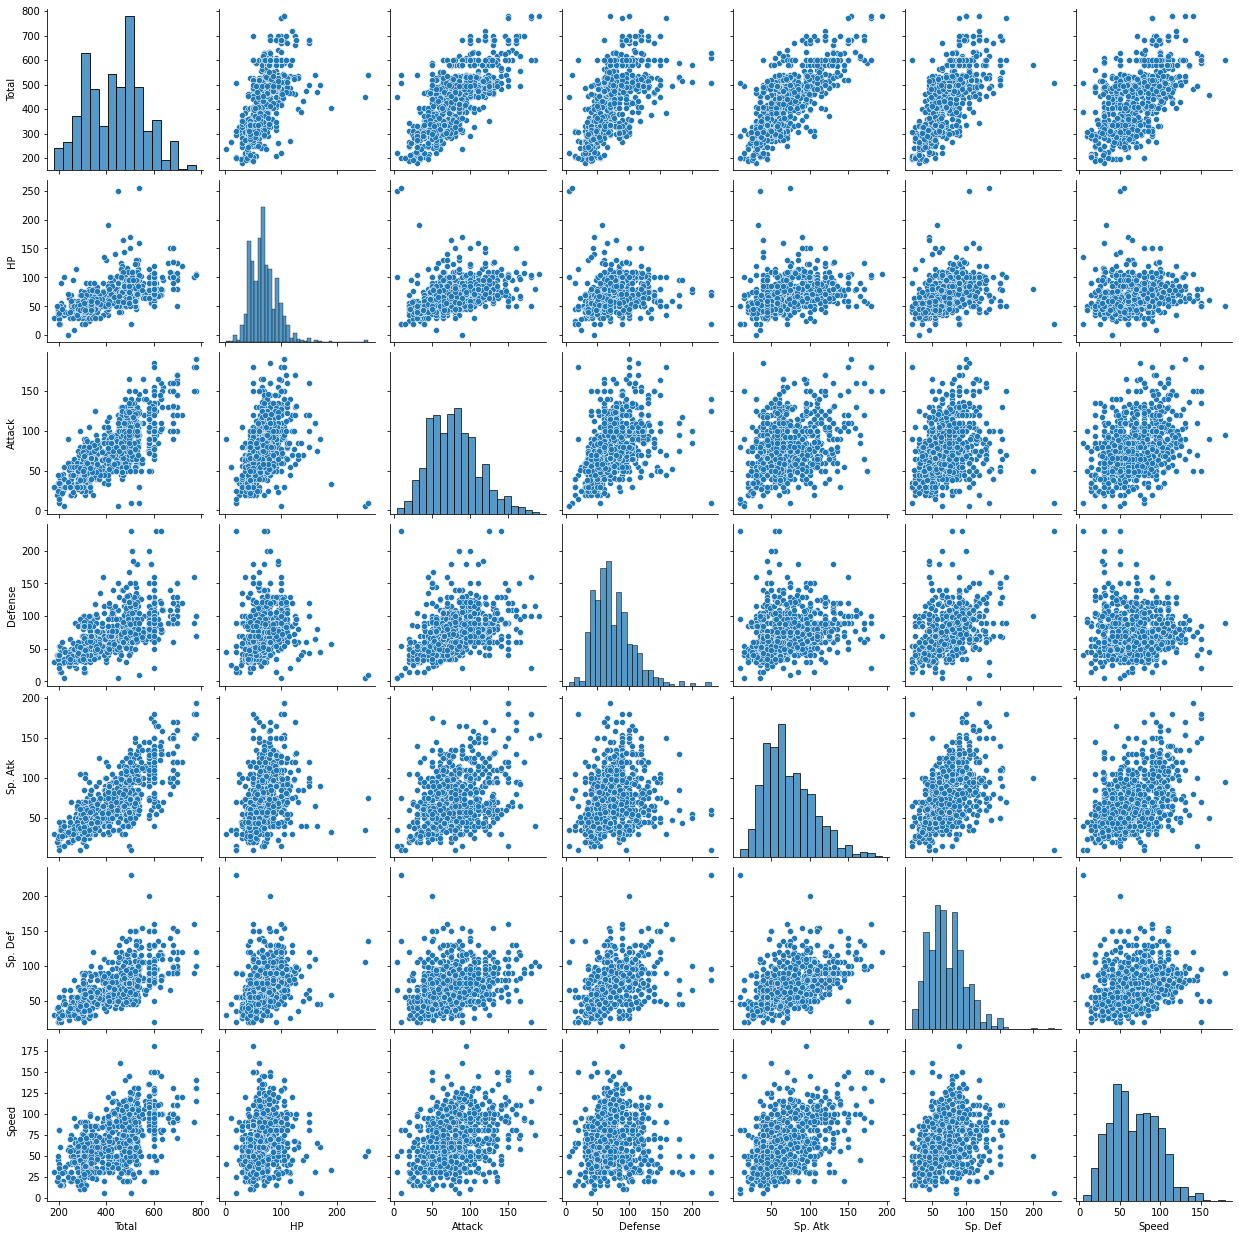

In [ ]:
sns.pairplot(Pokedex[['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed']]);

**KMeans**
KMeans is easy to understand and very practical to use, it is very useful to give you quick insights about the data you are studying. It is very useful for a variety of applications such as market segmentation, document clustering, image segmentation and image compression, etc.

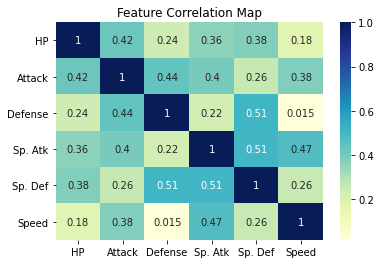

In [ ]:
# Features correlation
Skills = [ 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed']
sns.heatmap(Pokedex[Skills].corr(),cmap="YlGnBu", annot=True);
plt.title("Feature Correlation Map");

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
#import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
StdScale = scale.fit_transform(Pokedex[Skills])

n_max_clusters = 15
# Elbow Method
score = []
for cluster in range(1,n_max_clusters):
    kmeans_f = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
    kmeans_f.fit(StdScale)
    score.append(kmeans_f.inertia_)

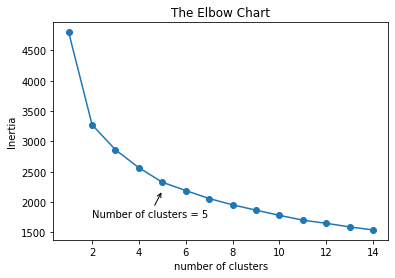

In [ ]:
# plotting elbow graphics

plt.plot(range(1,n_max_clusters), score)
plt.scatter(range(1,n_max_clusters), score)

plt.title('The Elbow Chart')
plt.xlabel('number of clusters')
plt.ylabel('Inertia')

n = 5
plt.annotate(f"Number of clusters = {n}", xy=(n, score[n]), xytext=(n-3, score[n]*0.8), arrowprops=dict(arrowstyle="->"))


plt.show()

In [ ]:
# Running the model with number of clusters determined by Elbow MEthod
kmeans = KMeans(n_clusters = n, init="k-means++", random_state=10)
kmeans.fit(StdScale)
Pokedex["Clusters"] = kmeans.labels_

Centroids = pd.DataFrame(scale.inverse_transform(kmeans.cluster_centers_))
Centroids.columns = Skills
Centroids["Clusters"] = [0,1,2,3,4]

**Exploring the Clusters KMeans**

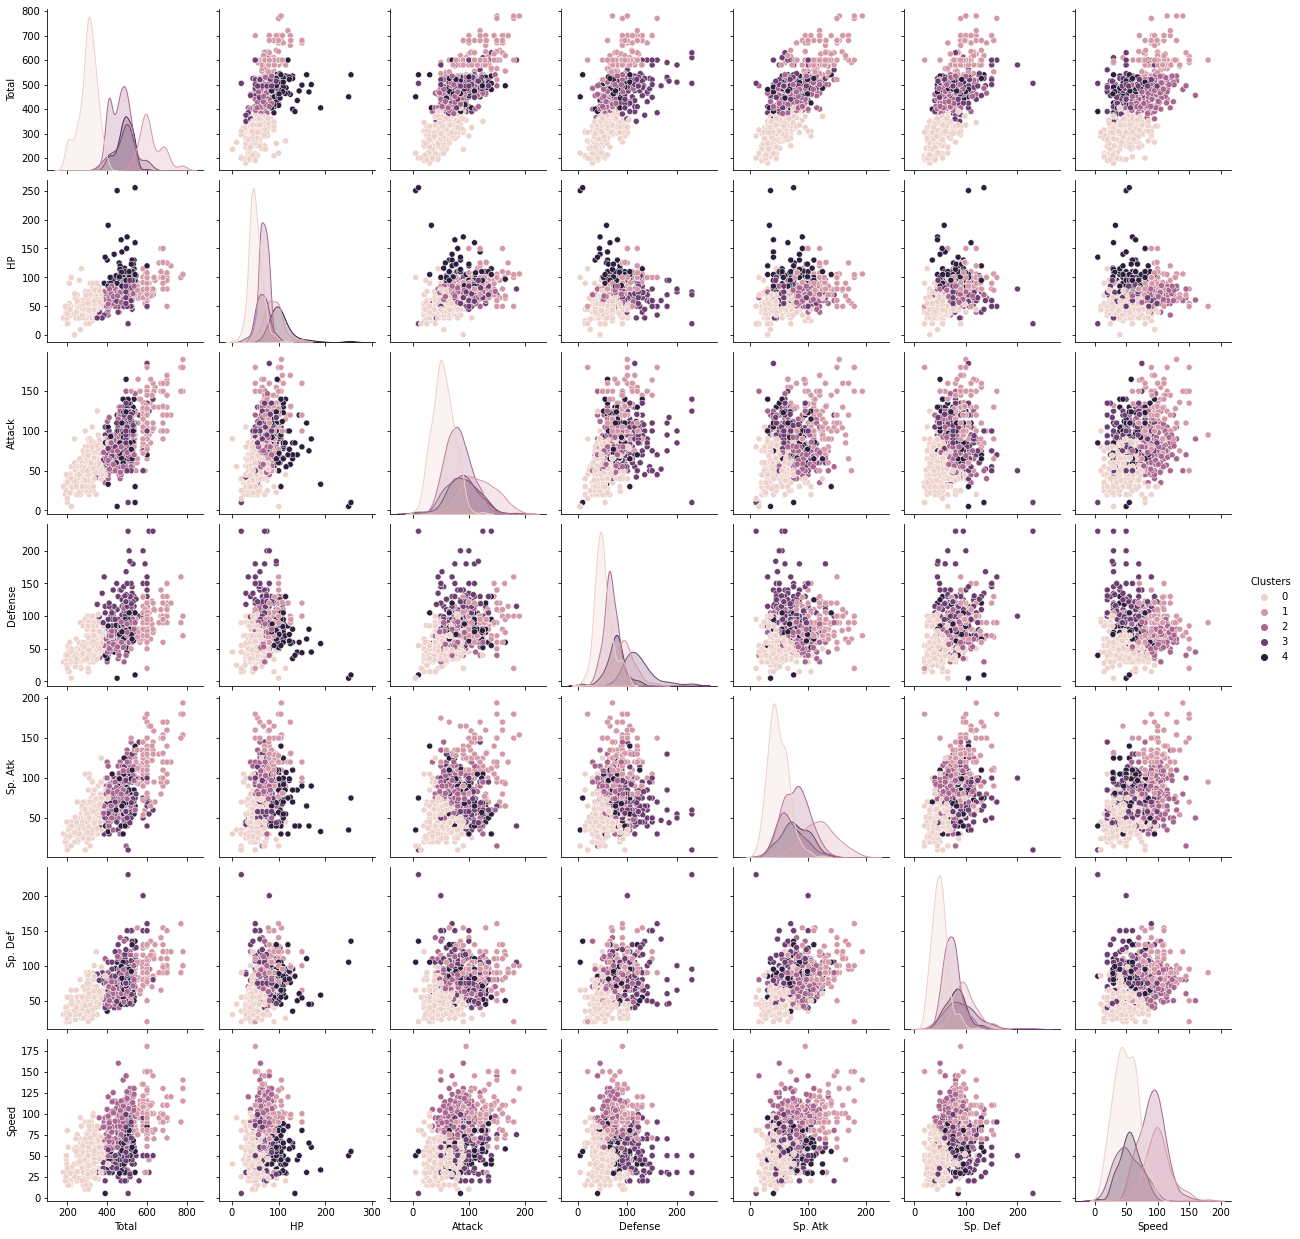

In [ ]:
sns.pairplot(Pokedex[['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', "Clusters"]], hue = "Clusters");

The groups in between are mixed and seem to have some particularity in each skill, it is hard to determine their characteristics by taking a look at pairplot.

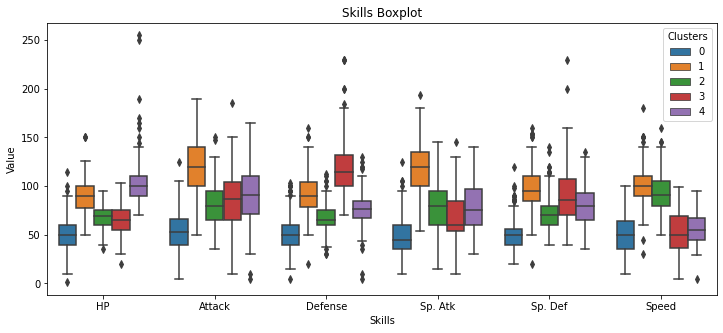

In [ ]:
BoxPlotPkdex = pd.melt(Pokedex, id_vars = [
    "#", 
    "Name", 
    "Type 1", 
    "Type 2", 
    "Generation",
    "Clusters"
    ], value_vars = [
    #"Total",
    "HP", "Attack", "Defense", "Sp. Atk",
    "Sp. Def", "Speed"    
])
plt.figure(figsize=(12,5))
ax = sns.boxplot(x="variable", y="value", hue = "Clusters", data=BoxPlotPkdex)
plt.title("Skills Boxplot")
plt.xlabel("Skills")
plt.ylabel("Value");

In [ ]:
GroupedPokedex = Pokedex.groupby(["Clusters"])

In [ ]:
Centroids.astype(int)

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Clusters
0,50,54,51,48,49,49,0
1,89,118,92,120,98,100,1
2,68,81,66,78,73,91,2
3,64,87,122,69,92,52,3
4,105,89,76,77,80,55,4


In [ ]:
Pokedex.groupby(["Clusters"]).agg({
    'HP': 'median', 
    'Attack': 'median', 
    'Defense': 'median', 
    'Sp. Atk': 'median', 
    'Sp. Def': 'median', 
    'Speed': 'median'})

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Clusters,,,,,,
0,50.0,53.0,50,45,49.5,50
1,90.0,120.0,90,120,95.5,100
2,69.5,80.0,65,80,70.0,91
3,65.0,87.0,115,60,85.5,50
4,100.0,90.5,77,75,80.0,55


Plotting the Mean and the Median of the Clusters Skills in a Radar Chart may show us their main characteristics

In [ ]:
GroupedPokedex.get_group(4).sort_values("HP")

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Clusters
353,323,Camerupt,Fire,Ground,460,70,100,70,105,75,40,3,False,4
505,455,Carnivine,Grass,-,454,74,100,72,90,72,46,4,False,4
433,388,Grotle,Grass,-,405,75,89,85,55,65,36,4,False,4
667,606,Beheeyem,Psychic,-,485,75,75,75,125,95,40,5,False,4
50,45,Vileplume,Grass,Poison,490,75,80,85,110,90,50,1,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,594,Alomomola,Water,-,470,165,75,80,40,45,65,5,False,4
351,321,Wailord,Water,-,500,170,90,45,90,45,60,3,False,4
217,202,Wobbuffet,Psychic,-,405,190,33,58,33,58,33,2,False,4
121,113,Chansey,Normal,-,450,250,5,5,35,105,50,1,False,4


In [ ]:
Pokedex.to_csv("PokedexCluster.csv", index=False)